## Does the Team with the Better Win Percentage Win?

In [1]:
import pandas as pd
def get_teams():
    f = open("all_teams.txt","r")
    teams = [item.strip() for item in f]
    f.close()
    return teams

def create_team_dictionary():
    season = {}
    teams = get_teams()
    for team in teams:
        t = pd.read_csv(f'TeamResults\\all_truncated_csv_WL\\{team.strip()}_2019_truncated.csv')
        season[team.strip()] = t
    return season

teams = get_teams()
season = create_team_dictionary()

In [2]:
def convert_WL_Percent(rec):
    """
    Parameter: string or list containg W-L data, separated by a hyphen
    Return: float(s) containing win percentage(s)"""
    if isinstance(rec,str):
        rec = [rec]
    elif isinstance(rec,list):
        rec = rec
    else:
        raise Exception(f"parameter given was of {type(rec)} when it should be string or list")
    
    percent = []
    for record in rec:
        record = record.split('-')
        win = float(record[0])
        loss = float(record[1])
        total = win + loss
        percent.append(win / total)
        
    if len(percent) == 1:
        return percent[0]
    else:
        return percent

def convert_WL_Int(result):
    """
    Parameter: takes a string or list of "W" or "L" data and converts that to 1 and 0
    This is essentially a custom labeller
    returns list of outcomes in int form"""
    if isinstance(result,str):
        results = [result]
    elif isinstance(result,list):
        results = result
    else:
        raise Exception(f"parameter given was of {type(result)} when it should be string or list")
    
    outcomes = []
    for result in results:
        if result =="W":
            outcomes.append(1)
        else:
            outcomes.append(0)

    if len(outcomes) == 1:
        return outcomes[0]
    else:
        return outcomes

In [3]:
record = [item for item in season["SEA"]["W-L"]]
#convert_WL_Percent(record)

In [4]:
import numpy as np
result = [item for item in season["SEA"]["W/L"]]
np.array(convert_WL_Int(result))

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1])

In [5]:
def getProbOfWin(season, team):
#calculate both teams winning percentage
#which team has the higher percentage?  Did they win?  Counting.
#always stick with the home team
#outcomes: home higher - win: W++, home higher - loss: L++, home lower - win: L++, home lower - loss:W++
    T = 0
    F = 0
    for index,item in season[team].iterrows():
        if item.loc["Opp"] not in season:
            continue
        TeamWinPercentage = convert_WL_Percent(item.loc["W-L"])
        AwayWinPercentage = convert_WL_Percent(season[item.loc["Opp"]].loc[index]["W-L"])
        gameResult = convert_WL_Int(item.loc["W/L"])
        
        if TeamWinPercentage >= AwayWinPercentage:
            if gameResult == 1:
                T += 1
            else:
                F += 1
        else:
            if gameResult == 1:
                F += 1
            else:
                T += 1   
    
    
    return(T,F)

In [6]:
probability = {}
for team in get_teams():
    win,loss = getProbOfWin(season,team)
    probability[team] = (convert_WL_Percent(season[team].iloc[-1]["W-L"]),win / (win+loss))
    
probability

{'LAA': (0.4444444444444444, 0.6111111111111112),
 'HOU': (0.6604938271604939, 0.6666666666666666),
 'OAK': (0.5987654320987654, 0.5987654320987654),
 'TOR': (0.41358024691358025, 0.6481481481481481),
 'ATL': (0.5987654320987654, 0.5864197530864198),
 'MIL': (0.5493827160493827, 0.5987654320987654),
 'STL': (0.5617283950617284, 0.6481481481481481),
 'CHC': (0.5185185185185185, 0.5308641975308642),
 'ARI': (0.5246913580246914, 0.6049382716049383),
 'LAD': (0.654320987654321, 0.6604938271604939),
 'SFG': (0.47530864197530864, 0.5617283950617284),
 'CLE': (0.5740740740740741, 0.5679012345679012),
 'SEA': (0.41975308641975306, 0.6728395061728395),
 'MIA': (0.35185185185185186, 0.6481481481481481),
 'NYM': (0.5308641975308642, 0.6296296296296297),
 'WSN': (0.5740740740740741, 0.6234567901234568),
 'BAL': (0.3333333333333333, 0.6728395061728395),
 'SDP': (0.43209876543209874, 0.5493827160493827),
 'PHI': (0.5, 0.5617283950617284),
 'PIT': (0.42592592592592593, 0.6111111111111112),
 'TEX': (0

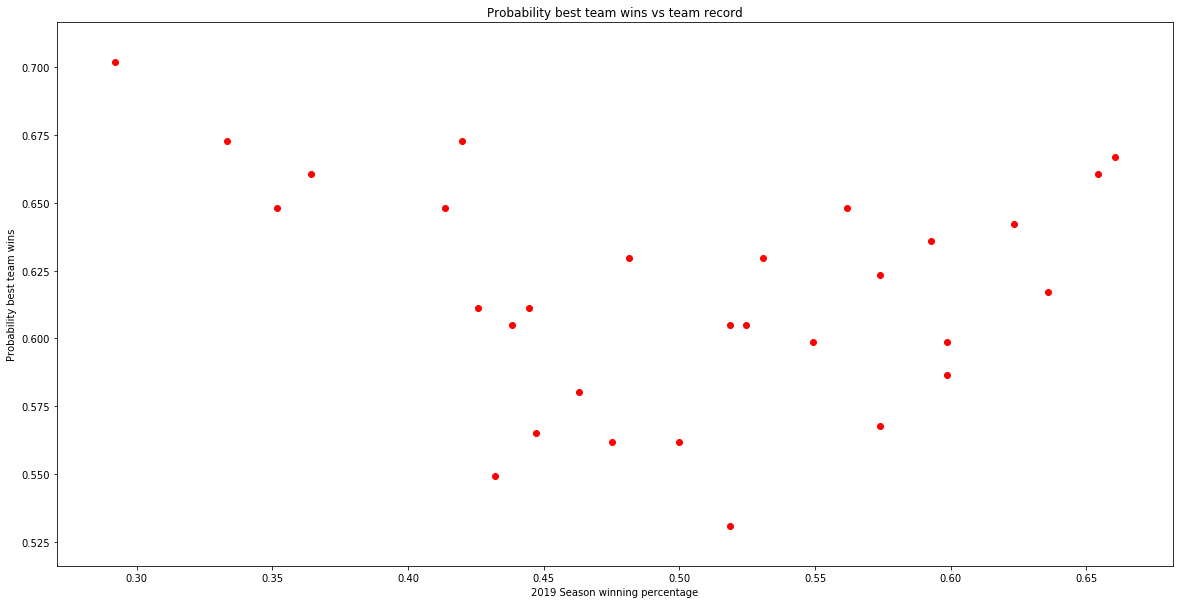

In [7]:
import matplotlib.pyplot as plt
X_values = []
y_values = []
for key, value in probability.items():
    X_values.append(value[0])
    y_values.append(value[1])

plt.figure(figsize= (20,10))
plt.title("Probability best team wins vs team record")
plt.ylabel("Probability best team wins")
plt.xlabel("2019 Season winning percentage")

plt.scatter(X_values,y_values,color='r')
plt.savefig("Images\\win_probability.png")
plt.show()

In [8]:
df = pd.read_csv("2019_all.csv")
df

,Date,Home_Win,Home,Away,Home_Streak,Away_Streak,Home_Win_Percentage,Away_Win_Percentage
0,thursday mar 28,W,OAK,LAA,-2,0,0.000000,0.000000
1,friday mar 29,L,OAK,LAA,1,-1,0.333333,0.000000
2,saturday mar 30,W,OAK,LAA,-1,1,0.250000,0.500000
3,sunday mar 31,W,OAK,LAA,1,-1,0.400000,0.333333
4,monday apr 1,W,SEA,LAA,2,-2,0.833333,0.250000
...,...,...,...,...,...,...,...,...
2424,sunday apr 14,L,NYY,CHW,1,-1,0.428571,0.307692
2425,thursday jun 13,W,CHW,NYY,1,-1,0.484848,0.621212
2426,friday jun 14,W,CHW,NYY,2,-2,0.492537,0.611940
2427,saturday jun 15,L,CHW,NYY,3,-3,0.500000,0.602941


In [9]:
wins = 0
underdog_win = 0
home_win = 0
away_win = 0
home_favored_win = 0
home_favored_loss = 0
away_favored_win = 0
away_favored_loss = 0
games = len(df)

for i in range(len(df)):
    home_percent = df.loc[i]['Home_Win_Percentage']
    away_percent = df.loc[i]['Away_Win_Percentage']
    outcome = df.loc[i]['Home_Win']
    
    #favored team wins
    if home_percent >= away_percent and outcome == 'W':
        home_win += 1
        wins += 1
        home_favored_win += 1
        
    elif home_percent < away_percent and outcome == 'L':
        away_win += 1
        wins += 1
        away_favored_win += 1
    
    #underdog wins
    elif home_percent >= away_percent and outcome == 'L':
        home_favored_loss += 1
        away_win += 1
        underdog_win += 1
        
    elif home_percent < away_percent and outcome == 'W':
        underdog_win += 1
        home_win += 1
        away_favored_loss += 1

print(f'Win Percentage of teams with higher win_percent: {round(wins/games,3)}')
print(f'Home Win Percentage: {round(home_win / games, 3)}')
print(f'Away Win Percentage: {round(away_win / games, 3)}')
print(f'Underdog Win Percentage: {round(underdog_win / games, 3)}')
print(f'Home Favored Win Percentage: {round(home_favored_win / (home_favored_win + home_favored_loss),3)}')
print(f'Away Favored Win Percentage: {round(away_favored_win / (away_favored_win + away_favored_loss),3)}')


Win Percentage of teams with higher win_percent: 0.58
Home Win Percentage: 0.529
Away Win Percentage: 0.471
Underdog Win Percentage: 0.42
Home Favored Win Percentage: 0.606
Away Favored Win Percentage: 0.552
